In [1]:
import bigbadbrain as bbb
import numpy as np
import matplotlib.pyplot as plt
import os
import json

In [ ]:
file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/imports/visual/exp-20190711-151148/'

In [25]:
pd_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/imports/20190712__done/fly1/func_0/TSeries-07122019-1334-000'

In [27]:
bbb.pd_csv_to_h5py(pd_file, 'TSeries-07122019-1334-000_Cycle00001_VoltageRecording_001.csv')

loading raw photodiode data... done
saving photodiode data as h5py file...done


In [4]:
pd_file = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_40/func_0/visual'

In [5]:
t,pd1,pd2 = bbb.load_photodiode(pd_file)

loading photodiode data... done


In [4]:
bbb.load_photodiode?

In [15]:
np.shape(pd)

(18000000,)

In [21]:
pd = pd[2]

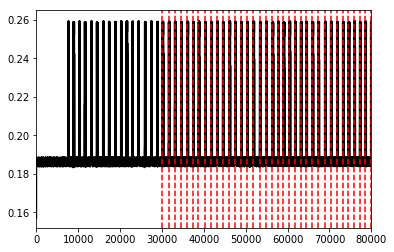

In [12]:
plt.plot(t,pd2,color='k')
for i in stimuli_starts:
    plt.axvline(i,color='r',linestyle='--')
plt.xlim(0,80*1000)
plt.show()

In [24]:
stimuli_starts

array([  60540.5,   61939.8,   63278.2, ..., 1711976.4, 1713514.8,
       1714974.9])

In [6]:
directory = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_40/func_0/visual'
unique_stimuli = get_stimuli(directory)

NameError: name 'get_stimuli' is not defined

In [10]:
stimuli, unique_stimuli = bbb.load_visual_stimuli_data(directory)

loading visual stimuli data... done


In [13]:
len(stimuli)

1152

In [11]:
stimuli_starts = parse_stim_starts_photodiode(pd2,stimuli)

In [7]:
def get_pd_thresh(pd):
    """ Finds threshold for ON vs OFF photodiode.

    Parameters
    ----------
    pd: photodiode values across time

    Returns
    -------
    threshold: int, threshold of ON vs OFF for photodiode

    """
    _, bins, _ = plt.hist(pd,bins=5)
    plt.close()
    threshold = (bins[0] + bins[-1]) / 2
    return threshold

In [8]:
def parse_stim_starts_photodiode(pd, stimuli):
    """ Finds all times in the photodiode recording when a stimulus began.

    Parameters
    ----------
    pd: photodiode values across time
    stimuli: all stimuli presented. Used for checking length of stimuli starts to make sure all stimuli were found

    Returns
    -------
    stimuli_starts: list of start times of all stimuli in order (in ms).

    """
    # Get threshold for on/off
    threshold = get_pd_thresh(pd)

    # Find timepoints when the light is off (and convert to ms)
    pd_sampling_to_ms_conversion = 10
    pd_off = np.where(pd<threshold)[0]/pd_sampling_to_ms_conversion

    # Find timepoints of rising edges
    min_gap = 1 # Lets give a 1 ms window for defining edges
    pd_on_edges = pd_off[np.where(np.diff(pd_off)>min_gap)[0]]

    # Remove any very early on edges cause by projector still getting ready etc.
    remove_on_before = 30*1000 # Currently a 1 min minimum
    pd_on_edges = [x for x in pd_on_edges if x > remove_on_before]
    
    # Add on edge at 0
    pd_on_edges = np.insert(pd_on_edges,0,0)

    # Find on_edges that correspond to stimuli presentation
    min_gap = 100 # Edges greater than 100ms apart are counted as stimuli starts
    stimuli_starts = pd_on_edges[np.where(np.diff(pd_on_edges)>min_gap)[0]+1]
    
    # Make sure we have successfully found all stimuli
    #if len(stimuli_starts) == len(stimuli):
    #    print('Successfully parsed all stimuli from photodiode output.')
    #else:
    ###    print(len(stimuli_starts))
    #    print(len(stimuli))
    #    raise Exception('Failed to successfully parse stimuli from photodiode output')
    return stimuli_starts #in ms

In [30]:
len(stimuli_starts)

1152

In [6]:
visual_destination = '/oak/stanford/groups/trc/data/Brezovec/2P_Imaging/20190101_walking_dataset/fly_39/func_1/visual'

In [7]:
unique_stimuli = bbb.get_stimuli(visual_destination)
with open(os.path.join(visual_destination, 'visual.json'), 'w') as f:
    json.dump(unique_stimuli, f, indent=4)

loading photodiode data... done
loading visual stimuli data... done
Successfully parsed all stimuli from photodiode output.
